# Algunos pasos comunes para la limpieza de datos

Importando librerías mas utilizadas

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargando un dataset de kaggle

In [79]:
import kagglehub
import os
path_kaggle = kagglehub.dataset_download("mathchi/diabetes-data-set")
ruta_df = os.path.join(path_kaggle, "diabetes.csv")
df_diabetes = pd.read_csv(ruta_df)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Revisión inicial de un dataset

- ```.info()```: muestra información general sobre el DataFrame.
    - Número total de filas
    - Nombre de cada columna
    - Tipo de dato (int64, float64, object, etc.)
    - Número de valores no nulos por columna
    - Uso aproximado de memoria
- ```.describe()```: genera estadísticas descriptivas para cada columna numérica por defecto.
    - **count**: número de valores no nulos
    - **mean**: media
    - **std**: desviación estándar
    - **min, max**: valores mínimo y máximo
    - **25%, 50%, 75%**: percentiles

In [80]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [81]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Manejo de datos faltantes 

Creando el dataframe de ejemplo

In [82]:
np.random.seed(42)
var_1 = np.random.rand(300)
nan_indices_var_1 = np.random.choice(len(var_1), 10, replace=False)
var_1[nan_indices_var_1] = np.nan
var_2 = np.random.rand(300)
nan_indices_var_2 = np.random.choice(len(var_2), 15, replace=False)
var_2[nan_indices_var_2] = np.nan
var_3 = np.random.rand(300)
var_4 = np.random.rand(300)
nan_indices_var_4 = np.random.choice(len(var_4), 40, replace=False)
var_4[nan_indices_var_4] = np.nan
var_5 = np.random.rand(300)

df_nulls = pd.DataFrame({"var_1": var_1,
                         "var_2": var_2,
                         "var_3": var_3,
                         "var_4": var_4,
                         "var_5": var_5})
print(df_nulls.head())

      var_1     var_2     var_3     var_4     var_5
0  0.374540  0.026367  0.650167  0.020861  0.012715
1  0.950714  0.376463  0.364697  0.653263  0.992415
2  0.731994  0.810553  0.560677  0.332315  0.671455
3  0.598658  0.987276  0.481062  0.542479  0.316922
4  0.156019  0.150417  0.884998  0.493277  0.879269


In [83]:
# cantidad de valores nulos por columna
df_nulls.isnull().sum()

var_1    10
var_2    15
var_3     0
var_4    40
var_5     0
dtype: int64

Eliminación de valores nulos (```NaN```) ya sea por columnas o filas

- Parámetros útiles de ```.dropna()```:
    - ```axis=0```: elimina filas que contienen valores nulos **(por defecto)**.
    - ```axis=1```: elimina columnas que contienen valores nulos.
    - ```how='any'```: elimina si hay al menos un valor nulo **(por defecto)**.
    - ```how='all'```: elimina si todos los valores son nulos.
    - ```subset=['var_1', 'var_2']```: aplica la eliminación solo a ciertas columnas. 

In [84]:
# se eliminó las filas que contienen al menos un valor nulo
print(f"Cantidad de filas: {df_nulls.shape[0]}")
print("-"*50)
df_nulls_rows = df_nulls.dropna()
print(df_nulls_rows)
print("-"*50)
print(f"Cantidad de filas sin valores nulos: {df_nulls_rows.shape[0]}")

Cantidad de filas: 300
--------------------------------------------------
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..        ...       ...       ...       ...       ...
293  0.360191  0.450839  0.329017  0.961666  0.110748
294  0.127061  0.113238  0.470183  0.634960  0.759582
295  0.522243  0.984841  0.744279  0.754838  0.988066
297  0.215821  0.124663  0.433655  0.409478  0.651668
299  0.085347  0.869896  0.161673  0.821806  0.254322

[240 rows x 5 columns]
--------------------------------------------------
Cantidad de filas sin valores nulos: 240


In [85]:
# se eliminó las columnas que contienen al menos un valor nulo
print(f"Cantidad de columnas: {df_nulls.shape[1]}")
print("-"*50)
df_nulls_cols = df_nulls.dropna(axis=1)
print(df_nulls_cols)
print("-"*50)
print(f"Cantidad de columnas sin valores nulos: {df_nulls_cols.shape[1]}")

Cantidad de columnas: 5
--------------------------------------------------
        var_3     var_5
0    0.650167  0.012715
1    0.364697  0.992415
2    0.560677  0.671455
3    0.481062  0.316922
4    0.884998  0.879269
..        ...       ...
295  0.744279  0.988066
296  0.871833  0.901296
297  0.433655  0.651668
298  0.043662  0.314061
299  0.161673  0.254322

[300 rows x 2 columns]
--------------------------------------------------
Cantidad de columnas sin valores nulos: 2


### Demostración de los valores nulos

Cantidad y porcentaje de valores nulos por variable (columnas)

  variable  nulos  porc_nulos
0    var_1     10        3.33
1    var_2     15        5.00
2    var_3      0        0.00
3    var_4     40       13.33
4    var_5      0        0.00


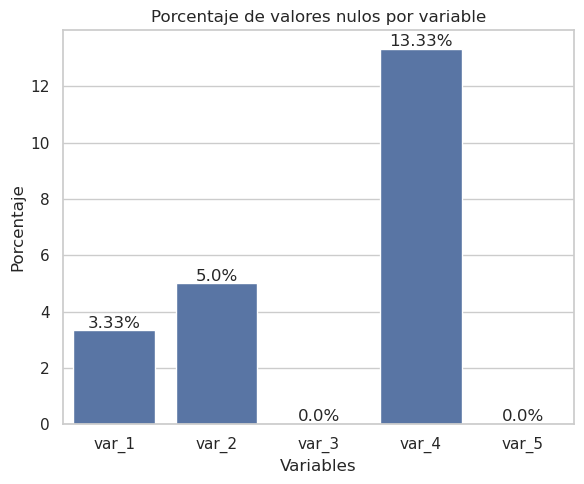

In [86]:
import seaborn as sns
nulls_var = df_nulls.isnull().sum().reset_index(name="nulos").rename(columns={"index":"variable"})
nulls_var["porc_nulos"] = round(nulls_var["nulos"]/df_nulls.shape[0]*100, 2)
print(nulls_var)

plt.figure(figsize=(6,5))
sns.barplot(data=nulls_var, x="variable", y="porc_nulos")
# cada row es una fila y se accede a su valor de una columna específica y se toma el primer valor con [0]
nulls_var.apply(lambda row: plt.text(x=nulls_var.index[nulls_var["variable"]==row["variable"]][0],\
                                     y=row["porc_nulos"] + 0.1, s=str(f"{row['porc_nulos']}%"),
                                     ha="center"), axis=1)
plt.title("Porcentaje de valores nulos por variable")
plt.ylabel("Porcentaje")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()

Cantidad y porcentaje de valores nulos por caso (filas)

   num_caso  nulos  porc_nulos
0        93      2        40.0
1       126      2        40.0
2       138      2        40.0
3       147      2        40.0
4       270      2        40.0


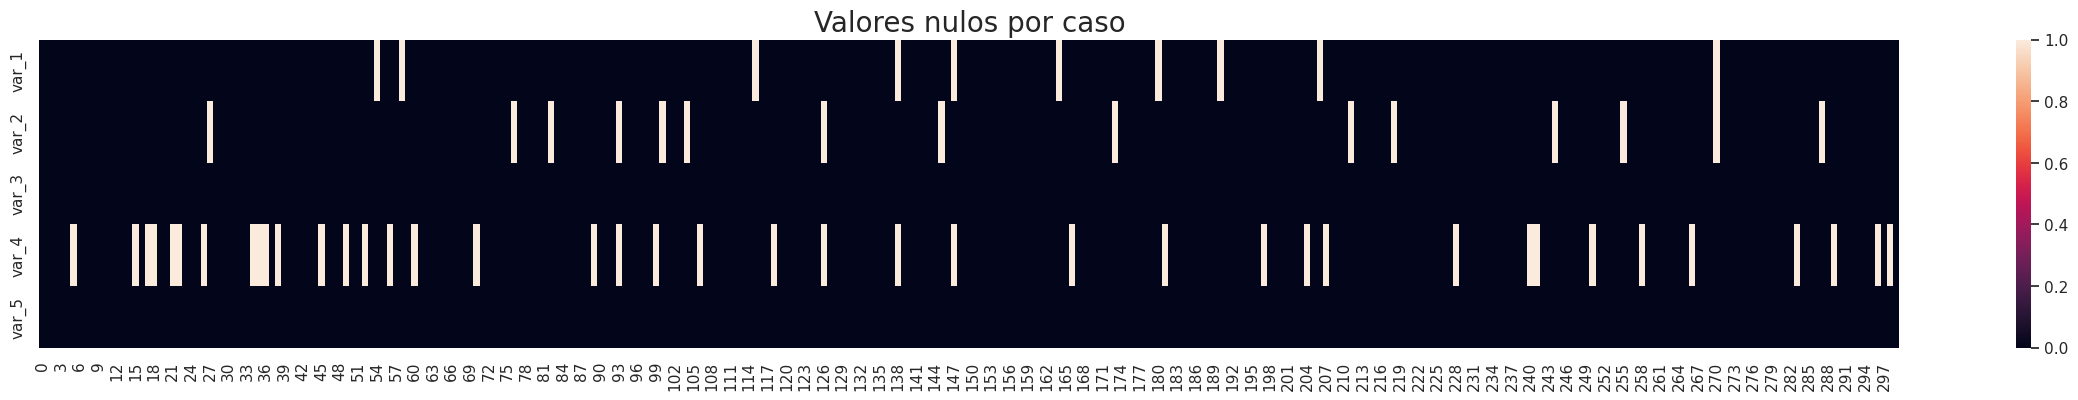

In [134]:
df_nulls_cases = df_nulls.assign(
    num_caso = df_nulls.index,
    nulos = df_nulls.isnull().sum(axis=1),
    porc_nulos = lambda df: round((df["nulos"]/df_nulls.shape[1])*100, 2)
).sort_values(by="porc_nulos", ascending=False)
print(df_nulls_cases[["num_caso", "nulos", "porc_nulos"]].reset_index(drop=True).head())

plt.figure(figsize=(30,4))
plt.title("Valores nulos por caso", size=20)
sns.heatmap(df_nulls.isnull().transpose())
plt.show()

### Imputación de valores nulos por contexto

In [88]:
# creando un segundo dataframe de ejemplo
df_nulls_2 = pd.DataFrame({"var_1": [1,2,3,np.nan,4,5],
                           "var_2": [4,np.nan,1,2,np.nan,8],
                           "var_3": [9,1,2,3,np.nan, np.nan],
                           "var_4": [np.nan,7,4,3,2,1]})
print(df_nulls_2)

   var_1  var_2  var_3  var_4
0    1.0    4.0    9.0    NaN
1    2.0    NaN    1.0    7.0
2    3.0    1.0    2.0    4.0
3    NaN    2.0    3.0    3.0
4    4.0    NaN    NaN    2.0
5    5.0    8.0    NaN    1.0


- ```.bfill()```: backward fill, completa los valores nulos con el último valor no nulo posterior (abajo hacia arriba)
- ```.ffill()```: forward fill, completa los valores nulos con el último valor no nulo anterior (arriba hacia abajo)

In [89]:
print(df_nulls_2.bfill())

   var_1  var_2  var_3  var_4
0    1.0    4.0    9.0    7.0
1    2.0    1.0    1.0    7.0
2    3.0    1.0    2.0    4.0
3    4.0    2.0    3.0    3.0
4    4.0    8.0    NaN    2.0
5    5.0    8.0    NaN    1.0


In [90]:
print(df_nulls_2.ffill())

   var_1  var_2  var_3  var_4
0    1.0    4.0    9.0    NaN
1    2.0    4.0    1.0    7.0
2    3.0    1.0    2.0    4.0
3    3.0    2.0    3.0    3.0
4    4.0    2.0    3.0    2.0
5    5.0    8.0    3.0    1.0


### Imputación de valores nulos con Sklearn

- Algunos tipos de strategy en ```SimpleImputer()```:
    - ```'mean'```: Reemplaza los valores nulos con la media de la columna, aplicable a **valores numéricas**.
    - ```'median'```: Reemplaza con la mediana, aplicable a **valores numéricas**.
    - ```'most_frequent'```: Reemplaza con el valor más frecuente (moda) aplicable a **valores numéricas** y **categóricas**.

In [91]:
# imputación de valores faltantes con la media de cada columna
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
df_nulls_mean = si.fit_transform(df_nulls)
df_nulls_mean = pd.DataFrame(df_nulls_mean, columns=df_nulls.columns)
print(f"Valores calculados para imputar los valores faltantes en cada columna: {', '.join(map(lambda x: str(round(x,3)), si.statistics_))}")
print("-"*70)
print(df_nulls_mean)

Valores calculados para imputar los valores faltantes en cada columna: 0.499, 0.493, 0.509, 0.493, 0.498
----------------------------------------------------------------------
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..        ...       ...       ...       ...       ...
295  0.522243  0.984841  0.744279  0.754838  0.988066
296  0.769994  0.838898  0.871833  0.492849  0.901296
297  0.215821  0.124663  0.433655  0.409478  0.651668
298  0.622890  0.920842  0.043662  0.492849  0.314061
299  0.085347  0.869896  0.161673  0.821806  0.254322

[300 rows x 5 columns]


Imputación basada en vecinos más cercanos (K-Nearest Neighbors).

In [ ]:
from sklearn.impute import KNNImputer

knn_impute = KNNImputer(n_neighbors=2)
df_nulls_knn = knn_impute.fit_transform(df_nulls)
df_nulls_knn = pd.DataFrame(df_nulls_knn, columns=df_nulls.columns)

# extrayendo los valores imputados por columna
valores_imputados = {}

for col in df_nulls.columns:
    # identificando las posiciones originalmente nulos
    pos_nulls = df_nulls[col].isnull()
    # extrayendo los valores imputados en esas posiciones
    valores_imputados[col] = df_nulls_knn.loc[pos_nulls, col].tolist()
print("Valores calculados para imputar los valores faltantes en cada columna:")
for col, valor in valores_imputados.items():
    valores = [round(v,3) for v in valor]
    print(f"Columna {col}: {valores}")

print("-"*70)
print(df_nulls_knn)

Valores calculados para imputar los valores faltantes en cada columna:
Columna var_1: [0.409, 0.145, 0.791, 0.264, 0.294, 0.49, 0.488, 0.583, 0.544, 0.831]
Columna var_2: [0.301, 0.322, 0.432, 0.678, 0.407, 0.858, 0.698, 0.817, 0.804, 0.812, 0.647, 0.771, 0.638, 0.658, 0.481]
Columna var_3: []
Columna var_4: [0.792, 0.165, 0.3, 0.583, 0.713, 0.73, 0.267, 0.328, 0.504, 0.452, 0.92, 0.77, 0.255, 0.605, 0.62, 0.271, 0.802, 0.268, 0.432, 0.626, 0.517, 0.833, 0.357, 0.409, 0.254, 0.658, 0.445, 0.688, 0.319, 0.528, 0.205, 0.334, 0.464, 0.287, 0.338, 0.236, 0.339, 0.205, 0.433, 0.696]
Columna var_5: []
----------------------------------------------------------------------
        var_1     var_2     var_3     var_4     var_5
0    0.374540  0.026367  0.650167  0.020861  0.012715
1    0.950714  0.376463  0.364697  0.653263  0.992415
2    0.731994  0.810553  0.560677  0.332315  0.671455
3    0.598658  0.987276  0.481062  0.542479  0.316922
4    0.156019  0.150417  0.884998  0.493277  0.879269
..

## Manejo de datos faltantes implícitos

Referido a los valores que no están registrados de forma explícita en el dataset, pero cuya ausencia representa un valor faltante.

In [93]:
import pandas as pd
import numpy as np
df_missing = pd.DataFrame.from_dict(
    data={
        "usuario": ["luis", "luis", "luis", "carlos"],
        "turno": ["mañana", "tarde", "noche", "mañana"],
        "monto": [250, 280, np.nan, 180]
    }
)
print(df_missing)

  usuario   turno  monto
0    luis  mañana  250.0
1    luis   tarde  280.0
2    luis   noche    NaN
3  carlos  mañana  180.0


Extendiendo las categorías para mayor visualización de los datos faltantes implícitos

In [94]:
df_missing_pivot = df_missing.pivot(values="monto", index="usuario", columns="turno")
print(df_missing_pivot)

turno    mañana  noche  tarde
usuario                      
carlos    180.0    NaN    NaN
luis      250.0    NaN  280.0


Exponiendo los valores faltantes implícitas a explícitas

In [95]:
import pandas as pd

# seleccionando los nombres de los usuarios y turnos únicos
usuarios = df_missing["usuario"].unique()
turnos = df_missing["turno"].unique()

# creando todas las combinaciones de usuarios con turnos
combinaciones = pd.MultiIndex.from_product([usuarios, turnos], names=["usuario", "turno"]).to_frame(index=False)

# uniendo las columnas de usuario y turno con df_1 (original)
df_implicit = combinaciones.merge(df_missing, on=["usuario", "turno"], how="left")
print(df_implicit)

  usuario   turno  monto
0    luis  mañana  250.0
1    luis   tarde  280.0
2    luis   noche    NaN
3  carlos  mañana  180.0
4  carlos   tarde    NaN
5  carlos   noche    NaN


Completando los valores faltantes implícitos

In [96]:
# completando los valores nulos con el promedio de cada monto por usuario  
df_implicit["monto"] = df_implicit.groupby("usuario")["monto"].transform(lambda x: x.fillna(x.mean()))
print(df_implicit)

  usuario   turno  monto
0    luis  mañana  250.0
1    luis   tarde  280.0
2    luis   noche  265.0
3  carlos  mañana  180.0
4  carlos   tarde  180.0
5  carlos   noche  180.0


Limitando la imputación de valores faltantes implícitos: solo se completarán con ceros aquellos campos que fueron expuestos en la tabla df_missing_pivot (pivot).

In [97]:
# solo se completará con 0 los valores que se están exponiendo en el pivot
df_missing.set_index(['usuario', 'turno']).reindex(combinaciones, fill_value=0).reset_index()

,usuario,turno,monto
0,luis,mañana,250.0
1,luis,tarde,280.0
2,luis,noche,NaN
3,carlos,mañana,180.0
4,carlos,tarde,0.0
5,carlos,noche,0.0


## Manejo de valores duplicados

In [98]:
df_duplicates = pd.DataFrame({
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Ana', 'Luis', 'Marta', 'Pedro', 'Carlos', 'Ana', 'Luis'],
    'Edad': [25, 30, 22, 25, 30, 28, 35, 22, 25, 30],
    'Ciudad': ['Lima', 'Ica', 'Arequipa', 'Lima', 'Ica', 'Puno', 'Lima', 'Ucayali', 'Puno', 'Ica'],
    'Puntaje': [85, 90, 88, 85, 90, 92, 80, 88, 85, 90],
    'Activo': [True, True, False, True, True, True, False, False, True, True]
})
print(df_duplicates)

   Nombre  Edad    Ciudad  Puntaje  Activo
0     Ana    25      Lima       85    True
1    Luis    30       Ica       90    True
2  Carlos    22  Arequipa       88   False
3     Ana    25      Lima       85    True
4    Luis    30       Ica       90    True
5   Marta    28      Puno       92    True
6   Pedro    35      Lima       80   False
7  Carlos    22   Ucayali       88   False
8     Ana    25      Puno       85    True
9    Luis    30       Ica       90    True


### Marcación de filas duplicadas

- Parámetros útiles de ```.duplicated()```:
    - ```keep="first"```: no muestra la primera aparición de cada duplicado.
    - ```keep="last"```: no muestra la última aparición de cada duplicado.
    - ```subset=['var_1', 'var_2']```: especifica qué columnas considerar para identificar duplicados.

In [99]:
# conserva la primera aparición y indica a las siguientes como duplicadas
df_duplicates[df_duplicates.duplicated(keep="first")]

,Nombre,Edad,Ciudad,Puntaje,Activo
3,Ana,25,Lima,85,True
4,Luis,30,Ica,90,True
9,Luis,30,Ica,90,True


In [100]:
# conserva la última aparición y indica a las siguientes como duplicadas
df_duplicates[df_duplicates.duplicated(keep="last")]

,Nombre,Edad,Ciudad,Puntaje,Activo
0,Ana,25,Lima,85,True
1,Luis,30,Ica,90,True
4,Luis,30,Ica,90,True


In [101]:
# conserva la primera aparición de la columna ciudad y indica a las siguientes como duplicadas
df_duplicates[df_duplicates.duplicated(keep="first", subset=["Ciudad"])]

,Nombre,Edad,Ciudad,Puntaje,Activo
3,Ana,25,Lima,85,True
4,Luis,30,Ica,90,True
6,Pedro,35,Lima,80,False
8,Ana,25,Puno,85,True
9,Luis,30,Ica,90,True


### Eliminación de filas duplicadas

- Parámetros útiles ```.drop_duplicates()```:
    - ```keep="first"```: conserva la primera aparición de cada duplicado.
    - ```keep="last"```: conserva la última aparición de cada duplicado.
    - ```keep=False```: elimina todos los duplicados.
    - ```subset=['var_1', 'var_2']```: especifica qué columnas considerar para identificar duplicados.

In [102]:
# conserva la primera aparición de cada duplicado
df_duplicates.drop_duplicates(keep="first")

,Nombre,Edad,Ciudad,Puntaje,Activo
0,Ana,25,Lima,85,True
1,Luis,30,Ica,90,True
2,Carlos,22,Arequipa,88,False
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True


In [103]:
# conserva la última aparición de cada duplicado
df_duplicates.drop_duplicates(keep="last")

,Nombre,Edad,Ciudad,Puntaje,Activo
2,Carlos,22,Arequipa,88,False
3,Ana,25,Lima,85,True
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True
9,Luis,30,Ica,90,True


In [104]:
# elimina todos las filas duplicadas
df_duplicates.drop_duplicates(keep=False)

,Nombre,Edad,Ciudad,Puntaje,Activo
2,Carlos,22,Arequipa,88,False
5,Marta,28,Puno,92,True
6,Pedro,35,Lima,80,False
7,Carlos,22,Ucayali,88,False
8,Ana,25,Puno,85,True


## Correción de tipos de datos

Creando el dataframe de prueba.

In [105]:
df_data = pd.DataFrame({'fecha_nacimiento': ['2015-12-07', '2015-07-23', '2016-12-17'],
                        'puntaje': ['15', '17', '12'],
                        'seccion': ['A', 'B', 'C']})
print(df_data.info())
print(df_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   fecha_nacimiento  3 non-null      object
 1   puntaje           3 non-null      object
 2   seccion           3 non-null      object
dtypes: object(3)
memory usage: 200.0+ bytes
None
  fecha_nacimiento puntaje seccion
0       2015-12-07      15       A
1       2015-07-23      17       B
2       2016-12-17      12       C


Dado las variables del dataframe se propone a corregir los tipos de datos ya sea fecha, número enteros y de tipo categórico

In [106]:
df_data["fecha_nacimiento"] = pd.to_datetime(df_data["fecha_nacimiento"])
df_data["puntaje"] = df_data["puntaje"].astype(int)
df_data["seccion"] = df_data["seccion"].astype('category')

Verificando el cambio de tipo de dato para cada variable:

Tipo fecha ```datetime64[ns]```, entero ```int64``` y categórico ```category```

In [107]:
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha_nacimiento  3 non-null      datetime64[ns]
 1   puntaje           3 non-null      int64         
 2   seccion           3 non-null      category      
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 311.0 bytes
None


### Corrección de algunos valores que indican fecha

Los valores de fecha han sido ingresados como enteros ```int64``` 

In [108]:
df_date = pd.DataFrame({"fecha_inscripcion": [20240115, 20240216, 20240305],
                        "usuario": ["Luis", "Diego", "Elizabeth"]})
print(df_date.info())
print("-"*50)
print(df_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha_inscripcion  3 non-null      int64 
 1   usuario            3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None
--------------------------------------------------
   fecha_inscripcion    usuario
0           20240115       Luis
1           20240216      Diego
2           20240305  Elizabeth


Cambiando el tipo de dato a la columna fecha_inscripcion ```datetime64[ns]```

In [109]:
df_date["fecha_inscripcion"] = pd.to_datetime(df_date["fecha_inscripcion"].astype(str), format="%Y%m%d" )
print(df_date.info())
print(df_date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha_inscripcion  3 non-null      datetime64[ns]
 1   usuario            3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes
None
  fecha_inscripcion    usuario
0        2024-01-15       Luis
1        2024-02-16      Diego
2        2024-03-05  Elizabeth


## Normalización y estandarización de datos

Creación de los datos siguiendo una distribución normal

In [110]:
np.random.seed(42)
datos = np.random.normal(60, 12, 700)

### Estandarización con ```Standard Scaler()``` y ```MinMaxScaler()```

- ```StandardScaler```: Transforma los datos para que tengan media 0 y desviación estándar 1.
- ```MinMaxScaler```: Escala los datos para que estén dentro de un rango definido, entre 0 y 1.


In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
datos_sc = sc.fit_transform(datos.reshape(-1,1))

min_max = MinMaxScaler()
datos_min_max = min_max.fit_transform(datos.reshape(-1,1))

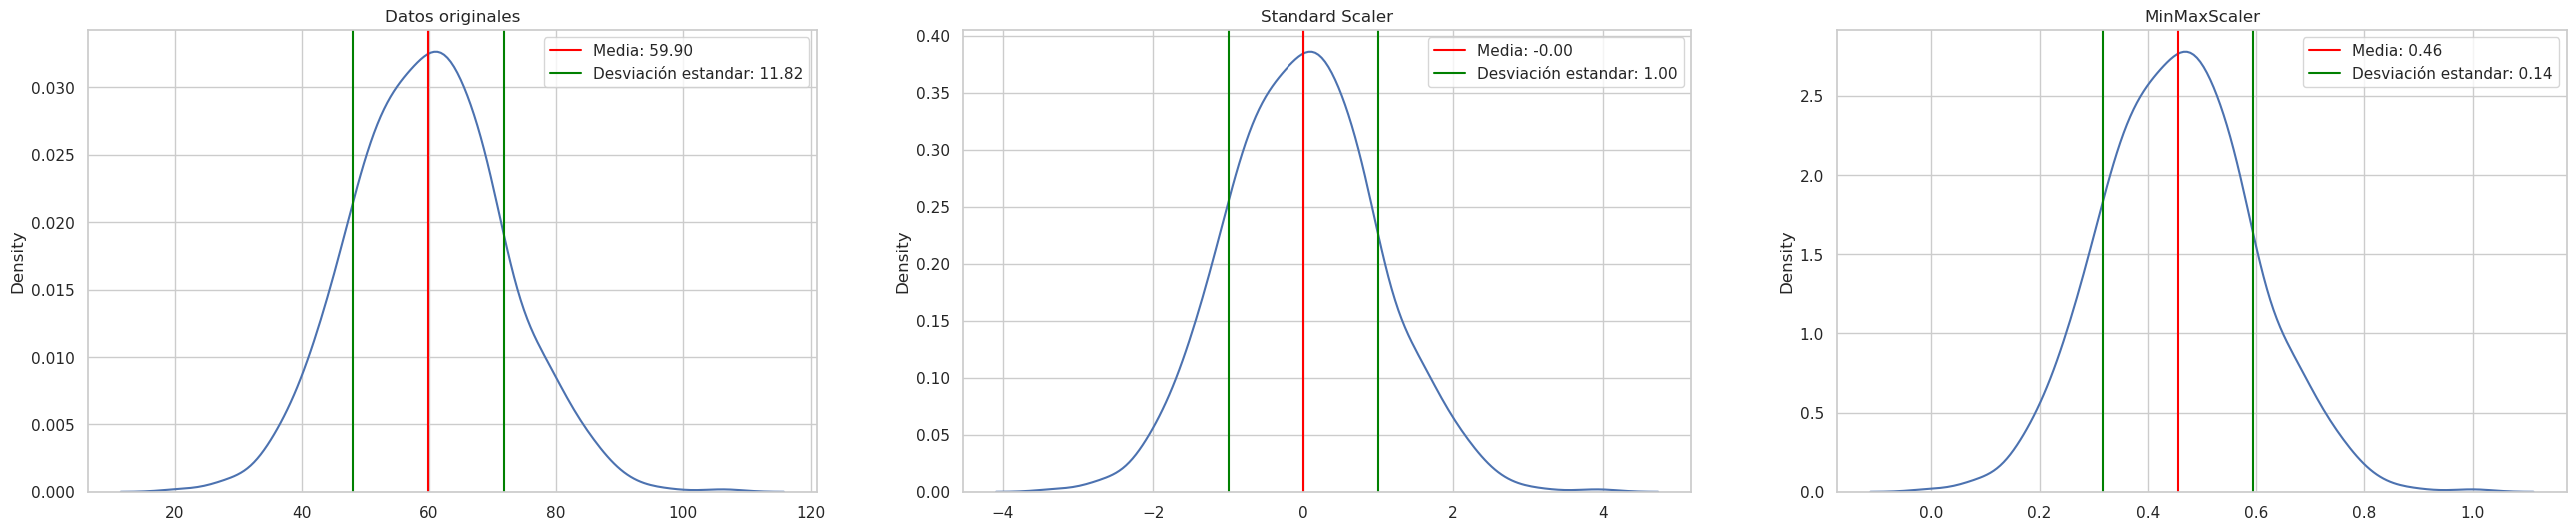

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(32, 6))
ax[0].set_title("Datos originales")
sns.kdeplot(datos, ax=ax[0])
ax[0].axvline(datos.mean(), color="red", label=f"Media: {datos.mean():.2f}")
ax[0].axvline(datos.mean() + datos.std(), color="green", label=f"Desviación estandar: {datos.std():.2f}")
ax[0].axvline(datos.mean() - datos.std(), color="green")
ax[0].legend(loc='upper right')
ax[1].set_title("Standard Scaler")
sns.kdeplot(datos_sc, ax=ax[1])
ax[1].axvline(datos_sc.mean(), color="red", label=f"Media: {datos_sc.mean():.2f}")
ax[1].axvline(datos_sc.mean() + datos_sc.std(), color="green", label=f"Desviación estandar: {datos_sc.std():.2f}")
ax[1].axvline(datos_sc.mean() - datos_sc.std(), color="green")
ax[1].legend(loc='upper right')
ax[2].set_title("MinMaxScaler")
sns.kdeplot(datos_min_max, ax=ax[2])
ax[2].axvline(datos_min_max.mean(), color="red", label=f"Media: {datos_min_max.mean():.2f}")
ax[2].axvline(datos_min_max.mean() + datos_min_max.std(), color="green", label=f"Desviación estandar: {datos_min_max.std():.2f}")
ax[2].axvline(datos_min_max.mean() - datos_min_max.std(), color="green")
ax[2].legend(loc='upper right')
plt.tight_layout
plt.show()

### Transformando los datos para que se asemeje a una distribución normal (Gaussiana)

Creando datos siguiendo una distribución exponencial

In [113]:
np.random.seed(42)
datos_exp = np.random.exponential(scale=70, size=200)

Importando la librería para asemejarlo a una distribución normal con ```PowerTransformer```

- Métodos útiles:
    - ```method="box-cox"```: Requiere que todos los valores sean estrictamente positivos.
    - ```method="yeo-johnson"```: Adminte valores negativos y cero.

In [114]:
from sklearn.preprocessing import PowerTransformer

power_t = PowerTransformer(method="box-cox")
datos_exp_power = power_t.fit_transform(datos_exp.reshape(-1,1))

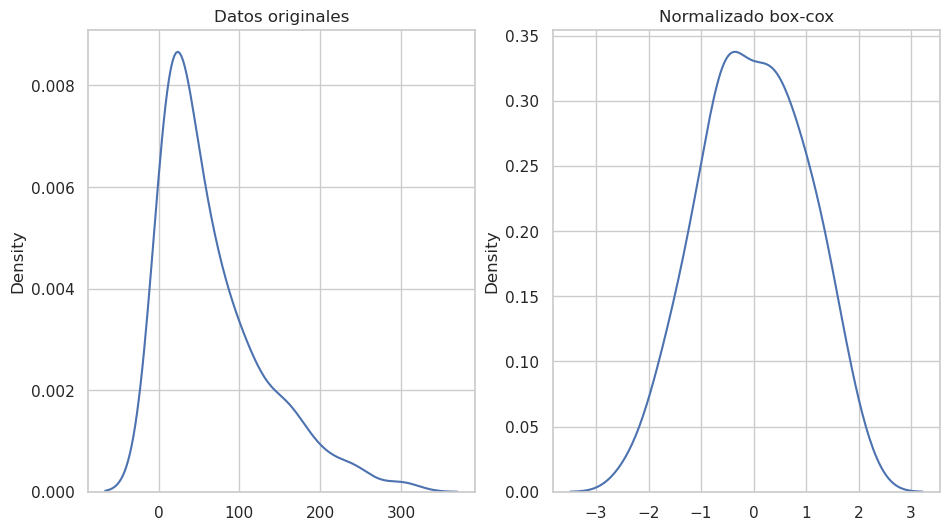

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(11, 6))
ax[0].set_title("Datos originales")
sns.kdeplot(datos_exp, ax=ax[0])
ax[1].set_title("Normalizado box-cox")
sns.kdeplot(datos_exp_power, ax=ax[1])
legend1 = ax[1].get_legend()
if legend1:
    legend1.remove()

plt.show()

## Manejo de valores atípicos (outliers)

In [116]:
np.random.seed(42)
# datos sesgados con distribución exponencial
datos_sesgados = np.random.exponential(scale=2, size=1000)
# insertando algunos outliers extremos manualmente
outliers = np.random.uniform(low=15, high=25, size=10)
datos_con_outliers = np.concatenate([datos_sesgados, outliers])

Identificando outliers con el índice intercuartílico

In [117]:
# definiendo el primer y tercer cuartil
Q1 = np.percentile(datos_exp, 25)
Q3 = np.percentile(datos_exp, 75)
# defineindo el indice intercuartílico
IQR = Q3 - Q1
# calculando el límite inferior y superior
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
# filtrando los datos eliminando los outliers
datos_sin_outliers = datos_exp[(datos_exp >= min) & (datos_exp <= max)]

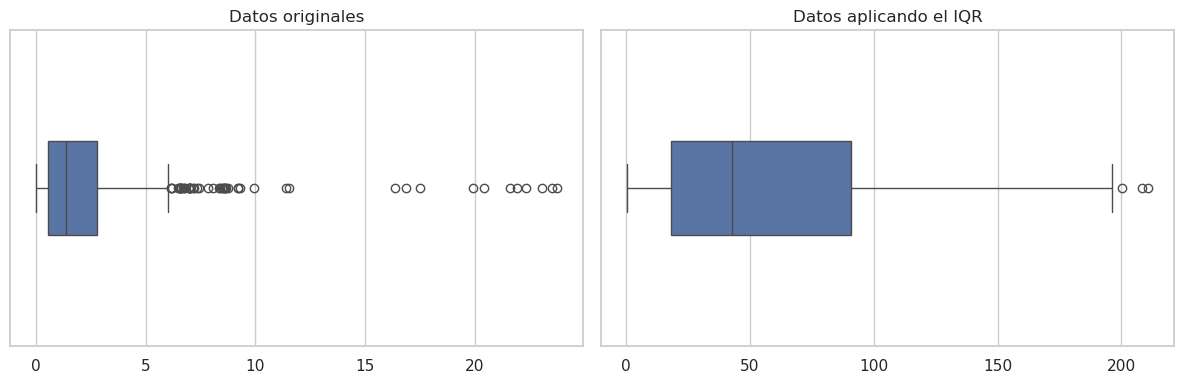

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title("Datos originales")
sns.boxplot(x=datos_con_outliers, width=0.3, ax=ax[0])
ax[1].set_title("Datos aplicando el IQR")
sns.boxplot(x=datos_sin_outliers, width=0.3, ax=ax[1])
plt.tight_layout()
plt.show()

## Corrección de errores tipográficos o errores de digitación

In [119]:
df_dig = pd.DataFrame({"profesion": ["administrador", "admin", "adm.", "psicologo", "psico", "psic."],
                       "nombres": ["alvaro", "diego", "ruben", "elizabeth", "veronica", "carla"],
                       "provincia": ["Lima", "LIMA", "lima", "Ate", "ate", "ate."]})
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1          admin      diego      LIMA
2           adm.      ruben      lima
3      psicologo  elizabeth       Ate
4          psico   veronica       ate
5          psic.      carla      ate.


Unificando datos categóricos de la columna profesion

In [120]:
admi_names = list(df_dig[df_dig["profesion"].str.contains("adm")]["profesion"])
# eliminando el nombre principal que se mantendrá
admi_names.remove("administrador")

In [121]:
df_dig.loc[df_dig["profesion"].isin(admi_names), "profesion"] = "administrador"
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1  administrador      diego      LIMA
2  administrador      ruben      lima
3      psicologo  elizabeth       Ate
4          psico   veronica       ate
5          psic.      carla      ate.


In [122]:
psic_names = list(df_dig[df_dig["profesion"].str.contains("psic")]["profesion"])
# eliminando el nombre principal que se mantendrá
psic_names.remove("psicologo")

In [123]:
df_dig.loc[df_dig["profesion"].isin(psic_names), "profesion"] = "psicologo"
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1  administrador      diego      LIMA
2  administrador      ruben      lima
3      psicologo  elizabeth       Ate
4      psicologo   veronica       ate
5      psicologo      carla      ate.


Transformando a minúscula los valores categóricos de la columna provincia

In [124]:
df_dig["provincia"] = df_dig["provincia"].str.lower()
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      lima
1  administrador      diego      lima
2  administrador      ruben      lima
3      psicologo  elizabeth       ate
4      psicologo   veronica       ate
5      psicologo      carla      ate.


Convirtiendo la primera letra en Mayúscula

In [125]:
df_dig["provincia"] = df_dig["provincia"].replace("ate.", "ate", regex=False)
df_dig["provincia"] = df_dig["provincia"].str.capitalize()
print(df_dig)

       profesion    nombres provincia
0  administrador     alvaro      Lima
1  administrador      diego      Lima
2  administrador      ruben      Lima
3      psicologo  elizabeth       Ate
4      psicologo   veronica       Ate
5      psicologo      carla       Ate


## Codificación de variables categóricas

- ```OneHotEncoder()```:  utilizada para convertir variables categóricas. Cada categoría se convierte en una columna binaria (0 o 1).

- ```LabelBinarizer()```: utilizada para convertir etiquetas categóricas en una forma binaria. 

In [126]:
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder

data = {'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Azul'],
        'Animal': ['Perro', 'Gato', 'Pez', 'Gato', 'Perro'],
        'Clase': ['A', 'B', 'A', 'C', 'B']}

df = pd.DataFrame(data)
print(df)

   Color Animal Clase
0   Rojo  Perro     A
1  Verde   Gato     B
2   Azul    Pez     A
3   Rojo   Gato     C
4   Azul  Perro     B


In [127]:
ohe = OneHotEncoder()
vars_ohe = ohe.fit_transform(df[["Color","Animal"]])
df_ohe = pd.DataFrame(vars_ohe.toarray(), columns=ohe.get_feature_names_out())
print(df_ohe)

   Color_Azul  Color_Rojo  Color_Verde  Animal_Gato  Animal_Perro  Animal_Pez
0         0.0         1.0          0.0          0.0           1.0         0.0
1         0.0         0.0          1.0          1.0           0.0         0.0
2         1.0         0.0          0.0          0.0           0.0         1.0
3         0.0         1.0          0.0          1.0           0.0         0.0
4         1.0         0.0          0.0          0.0           1.0         0.0


In [128]:
lb = LabelBinarizer()
lb_y = lb.fit_transform(df["Clase"])
df_lb = pd.DataFrame(lb_y, columns=[f"Clase_{name}" for name in lb.classes_])
print(df_lb)

   Clase_A  Clase_B  Clase_C
0        1        0        0
1        0        1        0
2        1        0        0
3        0        0        1
4        0        1        0
